# Nhiệm vụ 2: Khám phá và xử lý dữ liệu Marketing Campaign

**Mục lục**
1. Nạp dữ liệu
2. Kiểm tra dữ liệu cơ bản
3. Loại bỏ dữ liệu trùng lặp
4. Thay thế giá trị và thay đổi kiểu dữ liệu
5. Xử lý missing values
6. Trực quan hóa dữ liệu


In [13]:
# 🔹 Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Nạp dữ liệu (CSV tab-delimited)
marketing_data = pd.read_csv("data/marketing_campaign.csv", sep="\t")

# 🔹 Chọn các cột cần thiết
cols_needed = ['ID','Year_Birth', 'Education','Marital_Status','Income',
               'Kidhome','Teenhome','Dt_Customer','Recency','NumStorePurchases','NumWebVisitsMonth']

# 🔹 Lọc cột tồn tại trong CSV
marketing_data = marketing_data[[c for c in cols_needed if c in marketing_data.columns]]

# 🔹 Xem 5 dòng đầu tiên
marketing_data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,6,5


In [14]:
# 🔹 Kích thước dữ liệu
print("Số dòng, cột:", marketing_data.shape)

# 🔹 Kiểu dữ liệu và missing values
marketing_data.info()

# 🔹 Thống kê mô tả cho cột số
marketing_data.describe()


Số dòng, cột: (2240, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2216 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   NumStorePurchases  2240 non-null   int64  
 10  NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 192.6+ KB


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,5.790179,5.316518
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,13.000000,20.000000


In [15]:
# 🔹 Kiểm tra số dòng trùng lặp
print("Số dòng trùng lặp:", marketing_data.duplicated().sum())

# 🔹 Loại bỏ trùng lặp
marketing_data = marketing_data.drop_duplicates()
print("Kích thước sau khi loại bỏ trùng lặp:", marketing_data.shape)


Số dòng trùng lặp: 0
Kích thước sau khi loại bỏ trùng lặp: (2240, 11)


In [16]:
# 🔹 Thay Teenhome: 0 -> 'has no teen', 1/2 -> 'has teen'
marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace(
    [0,1,2], ['has no teen','has teen','has teen']
)

# 🔹 Điền missing values trong Income bằng 0
marketing_data['Income'] = marketing_data['Income'].fillna(0)

# 🔹 Chuyển kiểu dữ liệu Income từ float sang int
marketing_data['Income_changed'] = marketing_data['Income'].astype(int)

# 🔹 Kiểm tra kết quả
marketing_data[['Teenhome', 'Teenhome_replaced', 'Income', 'Income_changed']].head()


,Teenhome,Teenhome_replaced,Income,Income_changed
0,0,has no teen,58138.0,58138
1,1,has teen,46344.0,46344
2,0,has no teen,71613.0,71613
3,0,has no teen,26646.0,26646
4,0,has no teen,58293.0,58293


In [20]:
# 🔹 Kiểm tra missing values
marketing_data.isnull().sum()

# 🔹 Loại bỏ dòng có missing values (nếu cần)
marketing_data_clean = marketing_data.dropna(how='any')
print("Kích thước sau khi loại bỏ missing values:", marketing_data_clean.shape)


Kích thước sau khi loại bỏ missing values: (2240, 13)


In [18]:
# 🔹 Thay thế Teenhome: 0 -> 'has no teen', 1/2 -> 'has teen'
marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace(
    [0,1,2], ['has no teen','has teen','has teen']
)

# 🔹 Điền missing values trong Income bằng 0
marketing_data['Income'] = marketing_data['Income'].fillna(0)

# 🔹 Chuyển kiểu dữ liệu Income từ float sang int
marketing_data['Income_changed'] = marketing_data['Income'].astype(int)

# Kiểm tra kết quả
marketing_data[['Teenhome', 'Teenhome_replaced', 'Income', 'Income_changed']].head()


,Teenhome,Teenhome_replaced,Income,Income_changed
0,0,has no teen,58138.0,58138
1,1,has teen,46344.0,46344
2,0,has no teen,71613.0,71613
3,0,has no teen,26646.0,26646
4,0,has no teen,58293.0,58293


In [11]:
# 🔹 Kiểm tra missing values
marketing_data.isnull().sum()

# 🔹 Loại bỏ các dòng có missing values (nếu muốn)
marketing_data_clean = marketing_data.dropna(how='any')
marketing_data_clean.shape


(2240, 13)

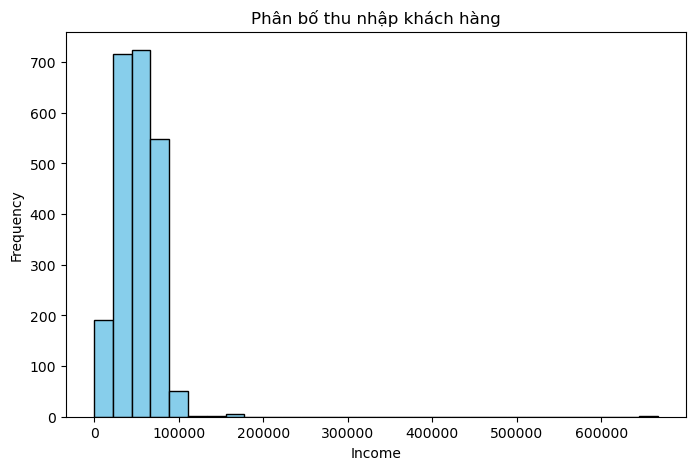

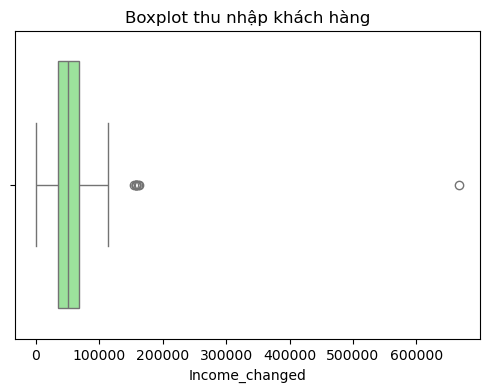

C:\Users\Dell\AppData\Local\Temp\ipykernel_13660\999843257.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=marketing_data, x='Teenhome_replaced', palette='pastel')


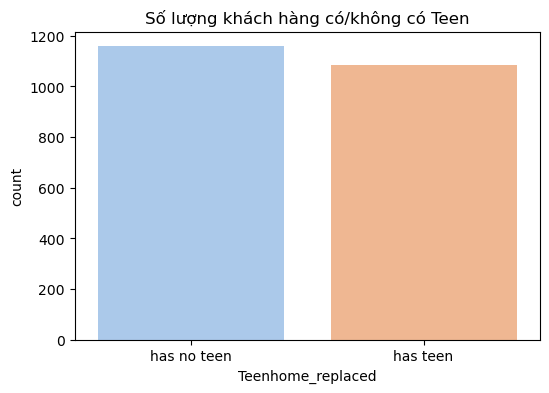

In [21]:
# 🔹 Histogram – phân bố thu nhập
plt.figure(figsize=(8,5))
plt.hist(marketing_data['Income_changed'], bins=30, color='skyblue', edgecolor='black')
plt.title("Phân bố thu nhập khách hàng")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# 🔹 Boxplot – kiểm tra ngoại lai trong Income
plt.figure(figsize=(6,4))
sns.boxplot(x=marketing_data['Income_changed'], color='lightgreen')
plt.title("Boxplot thu nhập khách hàng")
plt.show()

# 🔹 Countplot – số lượng khách theo Teenhome
plt.figure(figsize=(6,4))
sns.countplot(data=marketing_data, x='Teenhome_replaced', palette='pastel')
plt.title("Số lượng khách hàng có/không có Teen")
plt.show()
